In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [265]:
filename = 'train.csv'
#filename = 'test.csv'
df = pd.read_csv(filename)
df.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [266]:
df.columns = ['Id', 'ints']
a = df.ix[0].ints.split(',')[-1]

In [267]:
df['ints_list'] = df.ints.apply(lambda x: x.split(','))
df['ints_len'] = df.ints_list.apply(lambda x: len(x))
df['ints_data'] = df.ints_list.apply(lambda x: x[:-1])
df['res'] = df.ints_list.apply(lambda x: x[-1])
df['prev'] = df.ints_list.apply(lambda x: x[-2] if len(x) > 1 else np.nan)
df.drop('ints', axis=1, inplace=True)
print('Longest:', df.ints_len.max())
df.head()

Longest: 348


,Id,ints_list,ints_len,ints_data,res,prev
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730,31479360095907908092817694945
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424,1535
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152,1310720
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217,2321287521544174
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,"[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211,261753826248623853211


Indices: [ 89757  14223  40110 104068  95156   4023   6615   2621 102900  33064
 107649  60651  10367  28059  55988  63097]


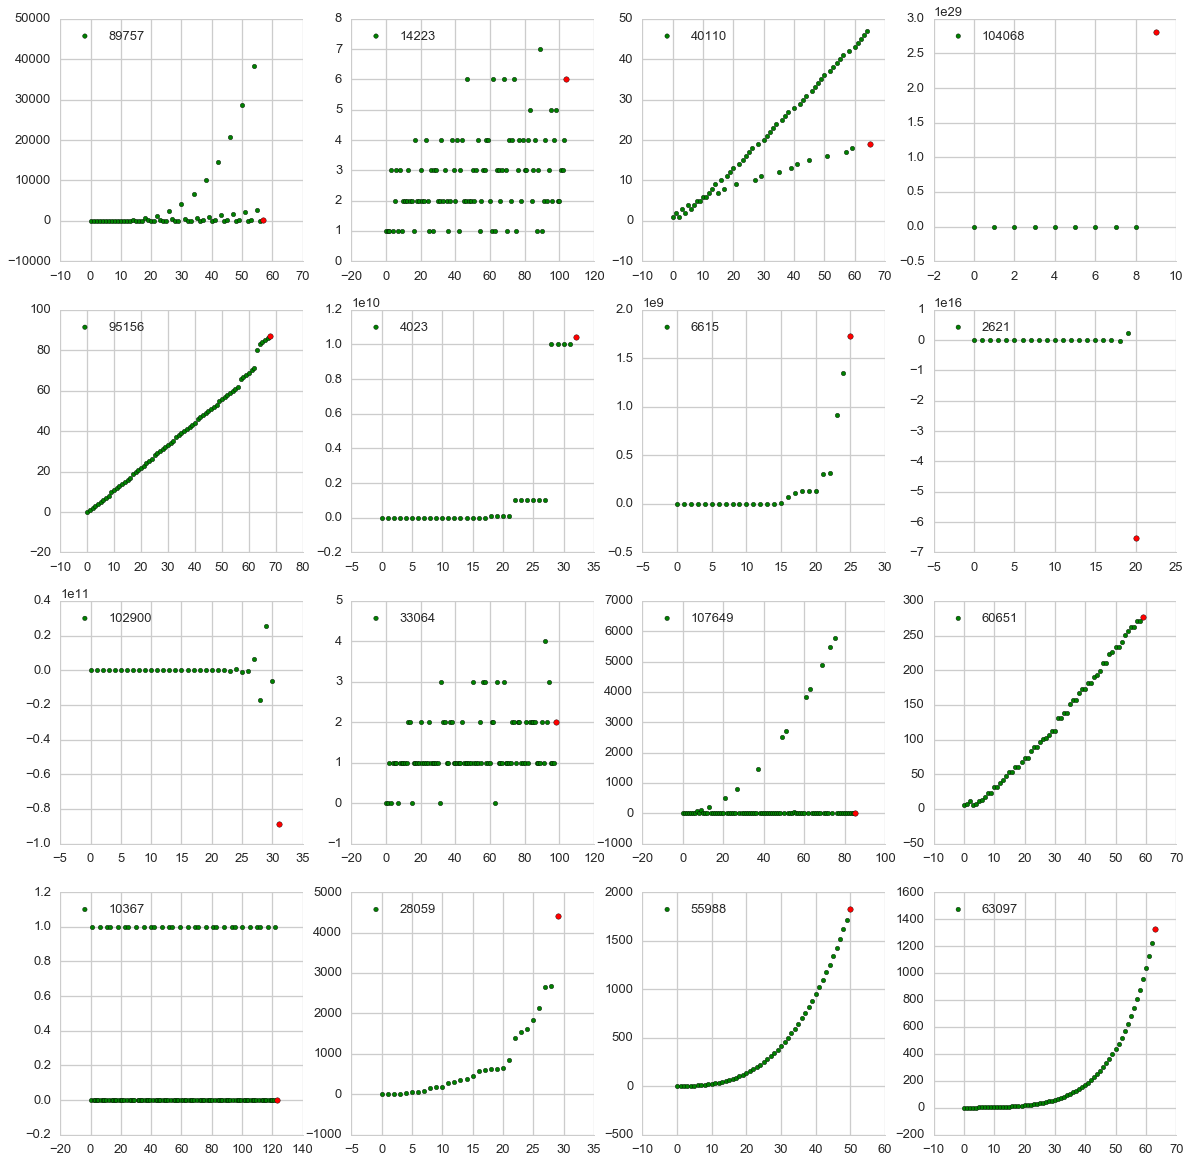

In [268]:
df.ints_len.max()
nrows, ncols = 4, 4
ar = np.random.randint(low=0, high=len(df.index), size=nrows*ncols)
print('Indices:', ar)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
sns.set(style='whitegrid', context='talk')
#for i in range(nrows * ncols):
cnt = 0
for i in ar:    
    row = df.ix[i]
    x = np.arange(row.ints_len)
    y = row.ints_data
    res = row.res
    plt.subplot(nrows, ncols, cnt + 1)
    plt.scatter(x[:-1], y, c='g', label=str(i))
    plt.scatter(x[-1], res, c='r', s=30)
    plt.legend(loc='upper left')
    cnt += 1
sns.despine()

In [280]:
df1 = df.iloc[28059]
df_train = pd.DataFrame()
df_train['x'] = np.arange(df1.ints_len)
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['x5'] = df_train.x ** 5
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x).astype(float)
df_train['x0'] = 1
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x).astype(float)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)
df_train['tan'] = np.tan(df_train.x)
df_train['res'] = df1.ints_list
df_train['prev'] = df_train.res.shift(1)
df_train['def'] = default_value
df_train = df_train[['x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'tan', 'prev', 'def', 'res']]
df_train.tail(10)

,x0,x,x2,x3,x4,x5,sqrt,odd,exp,log,sin,cos,tan,prev,def,res
20,1,20,400,8000,160000,3200000,4.472136,0,4.851652e+08,2.995732,0.912945,0.408082,2.237161,620,8,643
21,1,21,441,9261,194481,4084101,4.582576,1,1.318816e+09,3.044522,0.836656,-0.547729,-1.527499,643,8,849
22,1,22,484,10648,234256,5153632,4.690416,0,3.584913e+09,3.091042,-0.008851,-0.999961,0.008852,849,8,1391
23,1,23,529,12167,279841,6436343,4.795832,1,9.744803e+09,3.135494,-0.846220,-0.532833,1.588153,1391,8,1552
24,1,24,576,13824,331776,7962624,4.898979,0,2.648912e+10,3.178054,-0.905578,0.424179,-2.134897,1552,8,1613
25,1,25,625,15625,390625,9765625,5.000000,1,7.200490e+10,3.218876,-0.132352,0.991203,-0.133526,1613,8,1849
26,1,26,676,17576,456976,11881376,5.099020,0,1.957296e+11,3.258097,0.762558,0.646919,1.178754,1849,8,2122
27,1,27,729,19683,531441,14348907,5.196152,1,5.320482e+11,3.295837,0.956376,-0.292139,-3.273704,2122,8,2647
28,1,28,784,21952,614656,17210368,5.291503,0,1.446257e+12,3.332205,0.270906,-0.962606,-0.281430,2647,8,2673
29,1,29,841,24389,707281,20511149,5.385165,1,3.931334e+12,3.367296,-0.663634,-0.748058,0.887143,2673,8,4413


In [291]:
ints_ser = pd.Series(list(map(int, df1.ints_list)))
print('mean:', np.mean(ints_ser))
print('last:', df1.ints_list[-1])
try:
    freqs = ints_ser.value_counts() 
    if len(freqs.index) > 2:
        freq, next_freq = freqs.iloc[0], freqs.iloc[1]
        default_value = freqs.idxmax() if freq / next_freq >= 2 else df1.ints_list[-2]
        print('most frequent value: %d (freq = %d)' % (freqs.idxmax(), freqs.iloc[0]))
        print(freqs.head().to_string())
    else:
        default_value = df1.ints_list[-2]
except OverflowError:
    print('overflow')
    default_value = df1.ints_list[-2]

print('default value = ', default_value)

mean: 823.6333333333333
last: 4413
most frequent value: 4413 (freq = 1)
4413    1
1849    1
66      1
643     1
4       1
default value =  2673


In [292]:
# Check recursion

def get_matrix(seq, order):
    A = []
    for i in range(order + 1):
        s = [1] + seq[i:i+order]
        A = s if i == 0 else np.vstack([A, s]) 
    b = seq[order:2*order+1]
    return A, b

def check_recursion(seq):
    p = len(seq) - 1
    n = int(p/2 -1)
    try:
        A, b = get_matrix(seq, n)
        if  np.linalg.matrix_rank(A) - 1 < n:
            n = np.linalg.matrix_rank(A) - 1
            A, b = get_matrix(seq, n)
        w = np.linalg.solve(A, b)    
        # check
        feat_check_A = [1] + seq[n+1:2*n+1]
        feat_check_b = seq[2*n+1]
        if np.dot(feat_check_A, w) == feat_check_b:        
            feat_pred_A = [1] + seq[p-n+1:]
            predict = np.dot(feat_pred_A, w)
            return int(predict)
        else: return None        
    except:
        return None

In [293]:
print('Recursion:', check_recursion(list(map(int, df1.ints_list))))

Recursion: None


In [294]:
cols = [col for col in df_train.columns if col != 'res']
df_train.replace(np.inf, np.nan, inplace=True)
df_train.replace(-np.inf, np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train = df_train.reset_index()
print(cols)

['index', 'x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'tan', 'prev', 'def', 'predict', 'predict_ridge']


In [295]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
X_train = df_train[cols]
y_train = df_train.res
X_test = df_train[cols]
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
df_train['predict'] = pred

In [296]:
from sklearn import cross_validation
import warnings

alphas = [10 ** x for x in range(-5, 5)]
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    try:
        lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
        lr_rigdeCV.fit(X_train, y_train)
        best_alpha = lr_rigdeCV.alpha_        
    except: best_alpha = 0.1
    
print('Alpha =', best_alpha)    
lr_ridge = linear_model.Ridge(alpha=best_alpha)
lr_ridge.fit(X_train, y_train)
pred_ridge = lr_ridge.predict(X_test)
df_train['predict_ridge'] = pred_ridge

kf = cross_validation.KFold(len(X_train.index), n_folds=5, shuffle=True)
scores = cross_validation.cross_val_score(lr_ridge, X_train, y_train, cv=kf)
print('Cross validation score =', np.mean(scores))

Alpha = 1000.0
Cross validation score = 0.87005491683


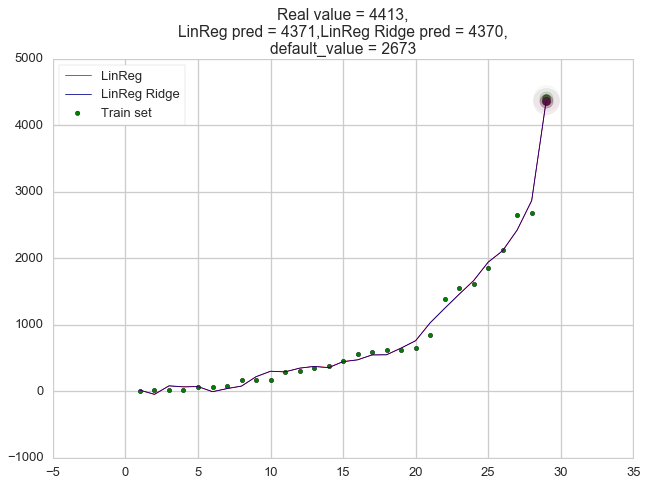

In [297]:
import seaborn as sns
sns.set(style='whitegrid', context='talk')
plt.scatter(df_train[:-1].x, df_train[:-1].res, s=20, c='g', label='Train set')

for j in range(5):    
    plt.scatter(df_train[-1:].x, df_train[-1:].res, s=50+5**j, c='green', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict,  s=50+5**j, c='red', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict_ridge,  s=50+5**j, c='darkblue', alpha=0.52-0.12*j, label='_')
    
plt.plot(df_train.x, df_train.predict, '-', c='r', lw=0.8, ms=5, label='LinReg')
plt.plot(df_train.x, df_train.predict_ridge, '-', c='darkblue', lw=0.8, ms=5, label='LinReg Ridge')
plt.legend(loc='upper left', frameon=True)
#sns.despine()
res = df_train[-1:].res
lr_p = int(np.round(float(df_train[-1:].predict.values[0])))
lrr_p = int(np.round(float(df_train[-1:].predict_ridge.values[0])))
plt.title('Real value = %s,\nLinReg pred = %s,LinReg Ridge pred = %s,\ndefault_value = %d'
          % (str(df_train[-1:].res.values[0]), str(lr_p), str(lrr_p), int(default_value)))

In [ ]:
st = time.time()
df['recursion'] = df.ints_list.apply(lambda x: check_recursion(list(map(int, x))))
print('Recursions checked. Time elapsed: %.2f min' % ((time.time() - st) / 60))

In [257]:
from sklearn import linear_model 
from sklearn import cross_validation
import time
preds = []
longest = df.ints_len.max() + 1
#cnt = 2
cnt = len(df.index)

df_train = pd.DataFrame()
df_train['x'] = np.arange(longest)
df_train['x0'] = 1
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x)
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)

alphas = [10 ** x for x in range(-4, 4)]
#nrows, ncols = 4, 4
#cnt = nrows * ncols
#fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,18))
#sns.set(style='whitegrid', context='notebook')

st = time.time()
for i in range(cnt):
    if (i % 1000 == 0) & (i != 0):
        print('Sequences: %d of %d, time elapsed: %.2f min, total estimated time: %.2f min' 
              % (i, cnt, (time.time() - st) / 60, (time.time() - st) * cnt / (60 * i)))        
    #print(i)
    df1 = df.ix[i]    
    df_curr = df_train[:df1.ints_len].copy(deep=True)    
    print(df1.ints_len, len(df_curr.index))
    df_curr['res'] = df1.ints_list
    df_curr['prev'] = df_curr.res.shift(1)
    ints_ser = pd.Series(list(map(int, df1.ints_list)))
    def_func = df1.ints_list[-1]
    #def_func = np.mean(ints_ser)
    try:
        freqs = ints_ser.value_counts() 
        if len(freqs.index) > 2:
            freq, next_freq = freqs.iloc[0], freqs.iloc[1]
            default_value = freqs.idxmax() if freq / next_freq >= 2 else def_func
        else:
            default_value = def_func
    except OverflowError:
        default_value = def_func
    
    df_curr['def'] = default_value
    df_curr = df_curr[['x0', 'x', 'x2', 'x3', 'x4', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'prev', 'def', 'res']]

    cols = [col for col in df_curr.columns if col != 'res']    
    df_curr = df_curr[1:].reset_index()
    
    if not df_curr.empty:    
        X_train = df_curr[cols]
        y_train = df_curr.res        
        X_test = df_curr[cols]        
        
        lr = linear_model.LinearRegression()        
        lr.fit(X_train, y_train)        
        pred = lr.predict(X_test)
        df_curr['predict'] = pred        
        #preds.append(df_curr[-1:].predict)
        
        with warnings.catch_warnings():
            warnings.simplefilter("error")            
            try:
                lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
                lr_rigdeCV.fit(X_train, y_train)
                best_alpha = lr_rigdeCV.alpha_
            except: best_alpha = 0.1
            
            try:
                lr_ridge = linear_model.Ridge(alpha=best_alpha)
                lr_ridge.fit(X_train, y_train)
                pred_ridge = lr_ridge.predict(X_test)
            except: pred_ridge = pred
                
            if len(X_train.index) > 5:
                try:
                    kf = cross_validation.KFold(len(X_train.index), n_folds=5, shuffle=True)
                    scores = cross_validation.cross_val_score(lr_ridge, X_train, y_train, cv=kf)
                    col_to_result = 'def' if np.mean(scores) < 0.95 else 'predict_ridge'
                except: col_to_result = 'predict_ridge'
            else: col_to_result = 'predict_ridge'

        df_curr['predict_ridge'] = pred_ridge
        preds.append(df_curr[-1:][col_to_result].values[0])
        
    else:
        preds.append(df1.ints_list[-1])
    
    #plt.subplot(nrows, ncols, i + 1)
    #plt.scatter(df_curr[:-1].x, df_curr[:-1].res, s=20, c='g', label='Train set ' + str(i))

    #for j in range(5):    
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].res, s=50+5**j, c='green', alpha=0.52-0.12*j, label='_')
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].predict,  s=50+5**j, c='red', alpha=0.52-0.12*j, label='_')
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].predict_ridge,  s=50+5**j, c='darkblue', alpha=0.52-0.12*j, label='_')

    #plt.plot(df_curr.x, df_curr.predict, '-', c='r', lw=0.8, ms=5, label='LinReg')
    #plt.plot(df_curr.x, df_curr.predict_ridge, '-', c='darkblue', lw=0.8, ms=5, label='LinReg Ridge')
    #plt.legend(loc='upper left', frameon=True)    
    
print(len(df.index), len(preds))
print('Time %.2f sec' % (time.time() - st))
print('Estimated time for full test data: %.2f min' % ((time.time() - st) * int(len(df.index)) / (60 * int(len(preds)))))
df['preds'] = preds

14 14
57 57
113845 2
Time 0.06 sec
Estimated time for full test data: 54.13 min


ValueError: Length of values does not match length of index

In [161]:
df['Last'] = df.recursion
df.Last.fillna(df.preds, inplace=True)
df['Last'] = df['Last'].apply(lambda x: int(np.round(float(x))))
print(df[['Id', 'Last']].head(10))
df[['Id', 'Last']].to_csv('submission.csv', sep=',', index=False)

   Id                        Last
0   1                           0
1   2                725161963867
2   4                          63
3   5                         402
4   6                          31
5   9                        1430
6  10                           1
7  12      7564280948067895607296
8  14  10576605944367233036713984
9  17      2795903765047156408320


In [133]:
# check train
df['res_str'] = df.res.apply(str)
df['last_str'] = df.Last.apply(str)
df[df.res_str == df.last_str].Id.count() / df.Id.count()

0.16139487900215205